#Proyek Pertama : Membuat Model NLP dengan TensorFlow


---

Daniel Shandy Adryan

1494037162101-932

danielshandy34@gmail.com

# Preparation

Importing the package, library, or API

In [1]:
import pandas as pd
import sklearn
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import tensorflow as tf
import matplotlib.pyplot as plt

defining classes and variables to shorten the syntaxes

In [2]:
#set stopwords to english
stop = set(stopwords.words('english'))

#classes used for training and testing
class txtrecog():
  tts = sklearn.model_selection.train_test_split
  tknzr = tf.keras.preprocessing.text.Tokenizer
  pseq = tf.keras.utils.pad_sequences

#classes used for creating models layer for training
class layer():
  lstm = tf.keras.layers.LSTM
  dns = tf.keras.layers.Dense
  dropout = tf.keras.layers.Dropout
  embed = tf.keras.layers.Embedding
  bn = tf.keras.layers.BatchNormalization

#classes used for callbacks
class scall(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epochs, logs={}):
    if (logs.get('val_accuracy') > 0.76):
      print ('Pelatihan Dihentikan Karena Akurasi Sudah Mencapai Nilai yang Diinginkan')
      self.model.stop_training = True

# Data Wrangling

Reading the csv-files, using stopwords, and seperate the punctuation

In [3]:
#reading csv files
df = pd.read_csv('/content/wine-reviews.csv',usecols = ['country', 'description', 'points', 'price', 'variety', 'winery'])

df.dropna(subset=["description", "points"], inplace = True)
df.drop_duplicates(subset=["description", "points"], inplace = True)
df.isnull().sum()
df['description'] = df['description'].str.lower()
df.head()

,country,description,points,price,variety,winery
0,Italy,"aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"this is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


Plotting 'Points' Columns and converting it into int32 type

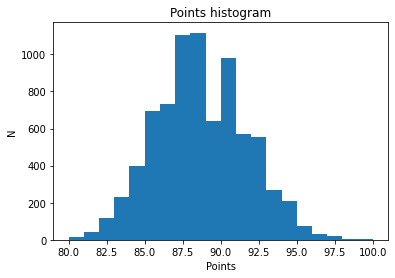

In [4]:
plt.hist(df.points, bins=20)
plt.title("Points histogram")
plt.ylabel("N")
plt.xlabel("Points")
plt.show()

In [5]:
df["label"] = (df.points >= 90).astype(int)
df = df[["description", "label"]]

defining stopwords

In [6]:
def del_stop_words (x):
  return ' '.join([ w for w in str(x).split() if w not in (stop) ])
df["description"] = df["description"].apply(lambda x: del_stop_words (x))
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,description,label
0,"aromas include tropical fruit, broom, brimston...",0
1,"ripe fruity, wine smooth still structured. fir...",0
2,"tart snappy, flavors lime flesh rind dominate....",0
3,"pineapple rind, lemon pith orange blossom star...",0
4,"much like regular bottling 2012, comes across ...",0


seperating the punctuation

In [7]:
tknz = nltk.RegexpTokenizer(r"\w+|\S+")
df["description"] = df["description"].apply(lambda x: ".".join([ w for w in (tknz.tokenize(x)) ]))
df.tail()

,description,label
7830,first.vintage.wine.available.united.states.mak...,0
7831,seems.emphasis.oak.fruit...oak.darn.tasty.—toa...,0
7832,"93.%.shiraz.,.many.wineries.would.labeled.shir...",0
7833,"structured.,.medium.-weight.wine.'s.nose.offer...",0
7834,add.new.winery.growing.list.walla.walla.-based...,0


inserting the values of selected columns into a few variables

In [8]:
plot = df['description'].values
label = df[['label']].values

# Text Tokenization

seperating the datasets into validation data and train data

In [9]:
Plot_train, Plot_test, label_train, label_test = txtrecog.tts(plot, label, test_size=0.2)

text tokenization process

In [10]:
tokenizer = txtrecog.tknzr(num_words=7000, oov_token='-')
tokenizer.fit_on_texts(Plot_train) 

seq_train = tokenizer.texts_to_sequences(Plot_train)
seq_tst = tokenizer.texts_to_sequences(Plot_test)

pad_train = txtrecog.pseq(
    seq_train,
    maxlen=30,
    padding='post',
    truncating='post') 
pad_tst = txtrecog.pseq(
    seq_tst,
    maxlen=30,
    padding='post',
    truncating='post')

# Training and Modelling

Modelling and compiling the NN

In [11]:
mdl = tf.keras.Sequential()
mdl.add(layer.embed(input_dim=7000, output_dim=32, mask_zero=True))
mdl.add(layer.bn())
mdl.add(layer.lstm(32))
mdl.add(layer.dns(2, activation='relu'))
mdl.add(layer.bn())
mdl.add(layer.dropout(0.4))
mdl.add(layer.dns(4, activation='relu'))
mdl.add(layer.bn())
mdl.add(layer.dropout(0.4))
mdl.add(layer.dns(8, activation='relu'))
mdl.add(layer.bn())
mdl.add(layer.dropout(0.4))
mdl.add(layer.dns(1, activation='sigmoid'))

mdl.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Training the model

In [12]:
hstr = mdl.fit(pad_train, label_train, epochs= 30,
                    validation_data=(pad_tst, label_test),
                    callbacks = [scall()], verbose=2)

Epoch 1/30
195/195 - 25s - loss: 0.8658 - accuracy: 0.5271 - val_loss: 0.6533 - val_accuracy: 0.6410 - 25s/epoch - 127ms/step
Epoch 2/30
195/195 - 8s - loss: 0.7447 - accuracy: 0.5827 - val_loss: 0.6561 - val_accuracy: 0.6410 - 8s/epoch - 39ms/step
Epoch 3/30
195/195 - 7s - loss: 0.7122 - accuracy: 0.6079 - val_loss: 0.6551 - val_accuracy: 0.6410 - 7s/epoch - 38ms/step
Epoch 4/30
195/195 - 4s - loss: 0.6913 - accuracy: 0.6175 - val_loss: 0.6549 - val_accuracy: 0.6410 - 4s/epoch - 20ms/step
Epoch 5/30
195/195 - 4s - loss: 0.6792 - accuracy: 0.6258 - val_loss: 0.6533 - val_accuracy: 0.6410 - 4s/epoch - 19ms/step
Epoch 6/30
195/195 - 4s - loss: 0.6668 - accuracy: 0.6353 - val_loss: 0.6486 - val_accuracy: 0.6410 - 4s/epoch - 19ms/step
Epoch 7/30
195/195 - 4s - loss: 0.6522 - accuracy: 0.6473 - val_loss: 0.6377 - val_accuracy: 0.6410 - 4s/epoch - 20ms/step
Epoch 8/30
195/195 - 4s - loss: 0.6329 - accuracy: 0.6574 - val_loss: 0.6161 - val_accuracy: 0.6429 - 4s/epoch - 20ms/step
Epoch 9/30
19

# Plotting

Loss Plotting

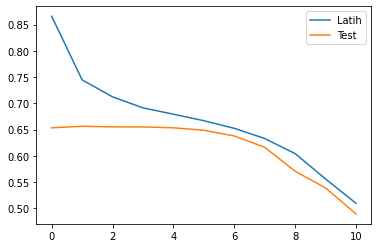

In [13]:
plt.plot(hstr.history['loss'], label = 'Latih')
plt.plot(hstr.history['val_loss'], label = 'Test')
plt.legend()

Accuracy Plotting

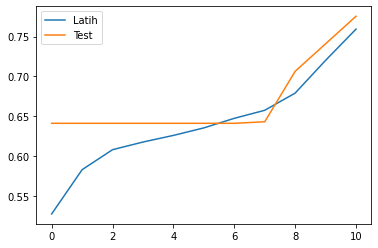

In [14]:
plt.plot(hstr.history['accuracy'], label = 'Latih')
plt.plot(hstr.history['val_accuracy'], label = 'Test')
plt.legend()